In [3]:
import tensorflow as tf

In [8]:
from tensorflow.keras.layers import GlobalMaxPooling1D, Dense, Input
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df = pd.read_csv("/content/drive/MyDrive/TensorFlow2.0/Datasets/twitter sentiment analysis/twitter_training.csv")

In [16]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [17]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [19]:
set(df["Positive"])

{'Irrelevant', 'Negative', 'Neutral', 'Positive'}

In [24]:
new_df = df.drop(['Borderlands', '2401'], axis=1)

In [25]:
new_df.columns

Index(['Positive', 'im getting on borderlands and i will murder you all ,'], dtype='object')

In [26]:
new_df.columns = ["target", "data"]

In [28]:
new_df.head()

,target,data
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [29]:
set(new_df['target'])

{'Irrelevant', 'Negative', 'Neutral', 'Positive'}

In [31]:
x = np.array([])
for i in new_df['target']:
  if i=='Positive': x = np.append(x, 0);
  elif i=='Negative': x = np.append(x, 1);
  elif i=='Neutral': x = np.append(x, 2);
  elif i=='Irrelevant': x = np.append(x, 3);
new_df['target'] = x
new_df.head()

,target,data
0,0.0,I am coming to the borders and I will kill you...
1,0.0,im getting on borderlands and i will kill you ...
2,0.0,im coming on borderlands and i will murder you...
3,0.0,im getting on borderlands 2 and i will murder ...
4,0.0,im getting into borderlands and i can murder y...


In [39]:
from sklearn.model_selection import train_test_split
set(new_df['target'])
x_train, x_test, y_train, y_test = train_test_split(new_df['data'], new_df['target'], test_size=0.30)
x_train = x_train.astype(str)
x_test = x_test.astype(str)

In [42]:
# Tokenizing Words

MAX_VOCAB_SIZE = 35000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [43]:
len(tokenizer.word_index)

31278

In [46]:
seq_train = pad_sequences(sequence_train)
seq_train.shape

(52276, 166)

In [47]:
seq_test = pad_sequences(sequences=sequence_test, maxlen=seq_train.shape[1])
seq_test.shape

(22405, 166)

In [49]:
# Defining the layers in the model 

i = Input(shape=(seq_train.shape[1],))
x = Embedding(len(tokenizer.word_index)+1, 30)(i)
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(4, activation='softmax')(x)

model = Model(i, x)

In [50]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
history = model.fit(seq_train, y_train, 
          validation_data=(seq_test, y_test),
          epochs=20
          )

Epoch 1/20
1634/1634 [==============================] - 213s 129ms/step - loss: 1.0406 - accuracy: 0.5649 - val_loss: 0.8211 - val_accuracy: 0.6833
Epoch 2/20
1634/1634 [==============================] - 143s 87ms/step - loss: 0.6135 - accuracy: 0.7793 - val_loss: 0.5893 - val_accuracy: 0.7920
Epoch 3/20
1634/1634 [==============================] - 142s 87ms/step - loss: 0.3926 - accuracy: 0.8623 - val_loss: 0.4868 - val_accuracy: 0.8258
Epoch 4/20
1634/1634 [==============================] - 141s 86ms/step - loss: 0.2875 - accuracy: 0.8966 - val_loss: 0.4436 - val_accuracy: 0.8411
Epoch 5/20
1634/1634 [==============================] - 142s 87ms/step - loss: 0.2277 - accuracy: 0.9166 - val_loss: 0.4300 - val_accuracy: 0.8499
Epoch 6/20
1634/1634 [==============================] - 144s 88ms/step - loss: 0.1904 - accuracy: 0.9290 - val_loss: 0.4181 - val_accuracy: 0.8563
Epoch 7/20
1634/1634 [==============================] - 146s 89ms/step - loss: 0.1642 - accuracy: 0.9379 - val_loss: 

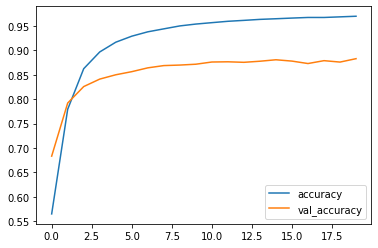

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

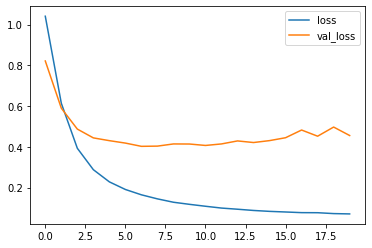

In [55]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()